# Importing essential libraries

In [1]:
pip install Keras-Preprocessing


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt

In [4]:
path =r"C:\Users\Admin\Downloads\archive\Original Images\Original Images/"
image_gen = ImageDataGenerator()
train_data = image_gen.flow_from_directory(path,target_size=(224, 224),batch_size=32)
class_label = list(train_data.class_indices.keys())


Found 2575 images belonging to 32 classes.


In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_label),activation='softmax'))


In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                        

In [19]:
clf= model.fit(train_data,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 363s 4s/step - loss: 4.2304 - accuracy: 0.0680
Epoch 2/30
81/81 [==============================] - 326s 4s/step - loss: 3.3445 - accuracy: 0.1247
Epoch 3/30
81/81 [==============================] - 328s 4s/step - loss: 3.0045 - accuracy: 0.1592
Epoch 4/30
81/81 [==============================] - 334s 4s/step - loss: 2.7246 - accuracy: 0.2268
Epoch 5/30
81/81 [==============================] - 336s 4s/step - loss: 2.4783 - accuracy: 0.2730
Epoch 6/30
81/81 [==============================] - 335s 4s/step - loss: 2.2998 - accuracy: 0.3344
Epoch 7/30
81/81 [==============================] - 808s 10s/step - loss: 2.0559 - accuracy: 0.3930
Epoch 8/30
81/81 [==============================] - 461s 6s/step - loss: 1.8414 - accuracy: 0.4252
Epoch 9/30
81/81 [==============================] - 826s 10s/step - loss: 1.6577 - accuracy: 0.4715
Epoch 10/30
81/81 [==============================] - 419s 5s/step - loss: 1.4395 - accuracy: 0.5581
Epoch 1

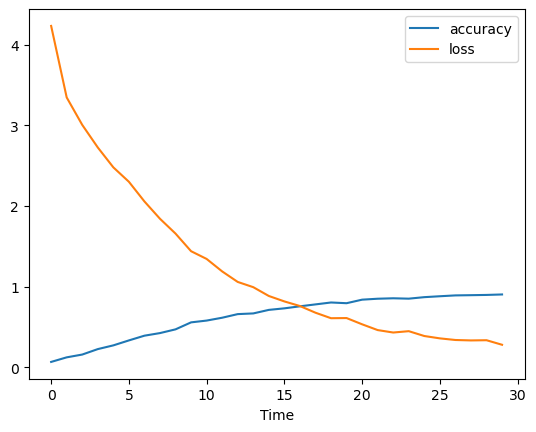

In [20]:
plt.plot(clf.history['accuracy'])
plt.plot(clf.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [24]:
 def prediction(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("\\")[-1]).split("_")[0])
    print("Predicted: "+(class_label[np.argmax(pred)]))


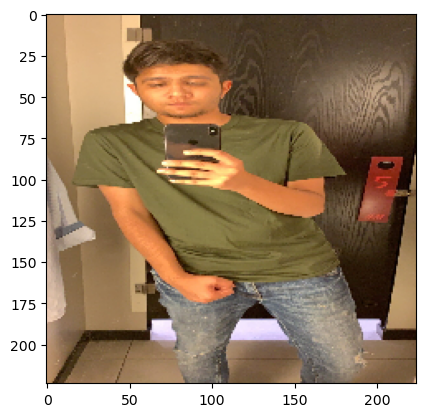

1/1 [==============================] - 0s 72ms/step
Actual: Marmik
Predicted: Marmik


In [25]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Marmik\Marmik_14.jpg")

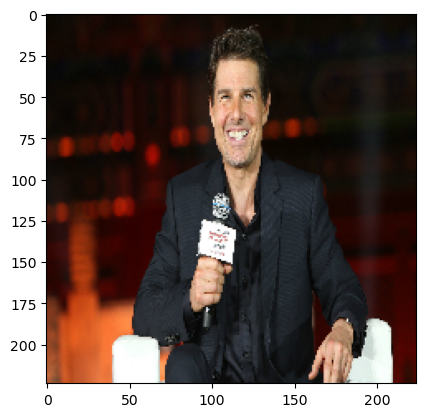

1/1 [==============================] - 0s 81ms/step
Actual: Tom Cruise
Predicted: Tom Cruise


In [26]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Tom Cruise\Tom Cruise_4.jpg")

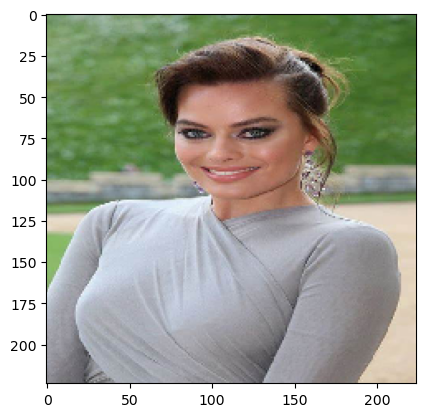

1/1 [==============================] - 0s 96ms/step
Actual: Margot Robbie
Predicted: Margot Robbie


In [30]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Margot Robbie\Margot Robbie_39.jpg")

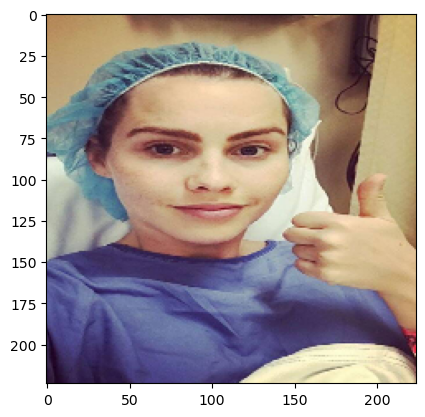

1/1 [==============================] - 0s 80ms/step
Actual: Claire Holt
Predicted: Claire Holt


In [31]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Claire Holt\Claire Holt_94.jpg")

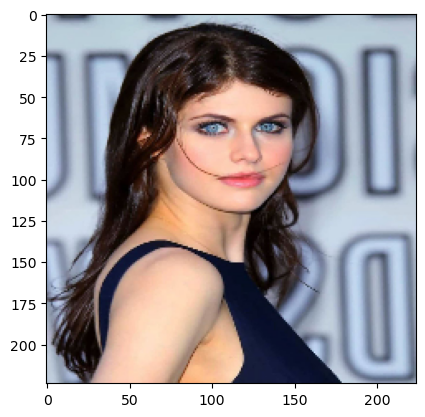

1/1 [==============================] - 0s 80ms/step
Actual: Alexandra Daddario
Predicted: Alexandra Daddario


In [32]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Alexandra Daddario\Alexandra Daddario_19.jpg")

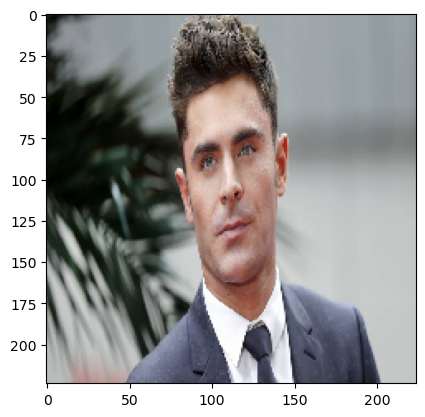

1/1 [==============================] - 0s 90ms/step
Actual: Zac Efron
Predicted: Zac Efron


In [33]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Zac Efron\Zac Efron_79.jpg")


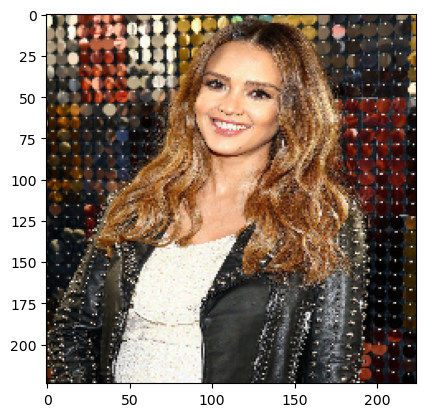

1/1 [==============================] - 0s 88ms/step
Actual: Jessica Alba
Predicted: Jessica Alba


In [34]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Jessica Alba\Jessica Alba_56.jpg")

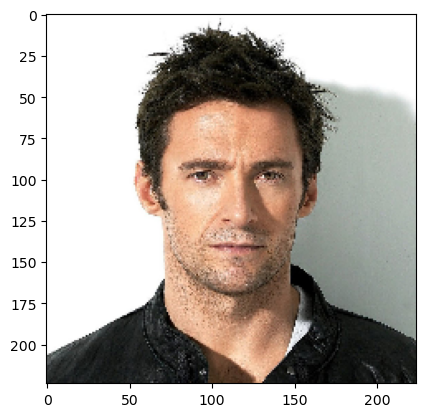

1/1 [==============================] - 0s 72ms/step
Actual: Hugh Jackman
Predicted: Hugh Jackman


In [35]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Hugh Jackman\Hugh Jackman_43.jpg")

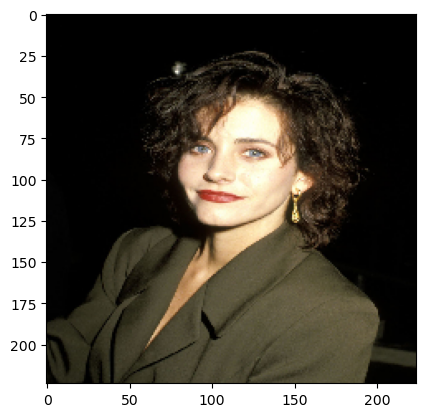

1/1 [==============================] - 0s 65ms/step
Actual: Courtney Cox
Predicted: Courtney Cox


In [36]:
prediction(r"C:\Users\Admin\Downloads\archive\Original Images\Original Images\Courtney Cox\Courtney Cox_5.jpg")